In [58]:
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load_from_pickle

# Load data

In [3]:
results_clustering = load_from_pickle("data/rank_isomorphism_test_results.pkl.gz")

# Extract data

In [57]:
# Well thats complicated ^^
number_cluster_rank = [i for i in range(len(results_clustering["clusters"]))]
number_cluster_after_isomorphism = [len(results_clustering["clusters"][key].values()) for key in results_clustering["clusters"].keys()]
max_size_cluster = [max([len(values) for values in (results_clustering["clusters"][key]).values()]) for key in results_clustering["clusters"].keys()]
min_size_cluster = [min([len(values) for values in (results_clustering["clusters"][key]).values()]) for key in results_clustering["clusters"].keys()]


# Plot

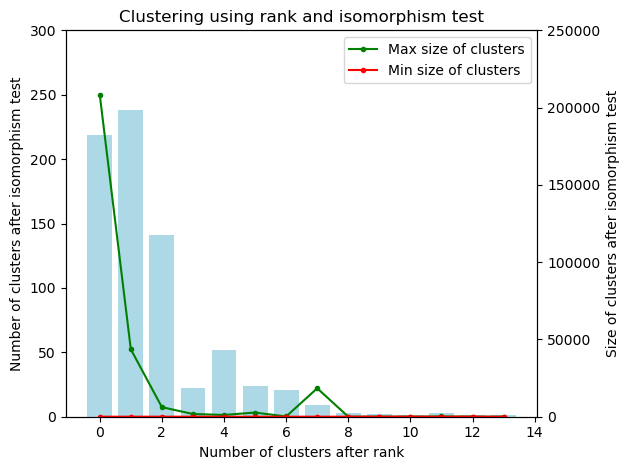

In [63]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x=number_cluster_rank, height=number_cluster_after_isomorphism, color="lightblue")
ax1.set_title("Clustering using rank and isomorphism test")
ax2.plot(number_cluster_rank, max_size_cluster, marker=".", color="green", label="Max size of clusters")
ax2.plot(number_cluster_rank, min_size_cluster, marker=".", color="red", label="Min size of clusters")
ax1.tick_params(axis='y',)
ax2.tick_params(axis='y')
ax2.set_ylabel('Size of clusters after isomorphism test')
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 250000)
ax1.set_xlabel("Number of clusters after rank")
ax1.set_ylabel('Number of clusters after isomorphism test')
ax2.legend(loc="upper right")
fig.tight_layout() 
plt.show()